# Laboratorium 2

In [6]:
import matplotlib.pyplot as plt
from numpy.random import exponential, uniform, normal
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

np.random.seed(145)

a)

In [2]:
def poiss_trajectory(lam, n):
    x = np.cumsum(exponential(lam, [1, n]))
    y = np.arange(1, n+1)
    return x, y

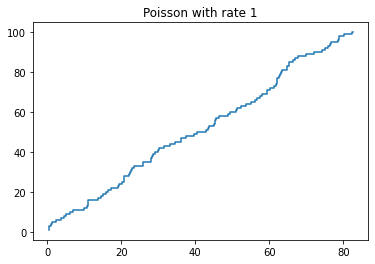

In [3]:
lam = 1
x, y = poiss_trajectory(lam, 100)
plt.step(x, y)
plt.title('Poisson with rate ' + str(lam))
plt.show()

b)

In [4]:
def generate_wiener1(n, end, start=0):
    t = np.linspace(start, end, n)
    y = [0] * n
    for i in range(1, n):
        y[i] = y[i-1] + np.sqrt(t[i] - t[i-1]) * normal(0, 1)
    return t, np.array(y)

0.010821104049682617


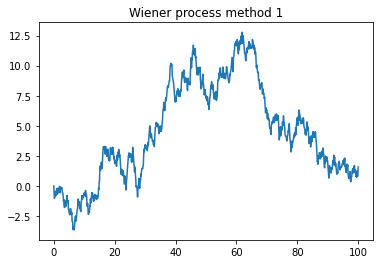

In [19]:
start_time = time.time()
t, y = generate_wiener1(1000, 100)
print(time.time() - start_time)
plt.plot(t, y)
plt.title('Wiener process method 1')
plt.show()

In [10]:
# metoda Choleskiego-Crouta
def cholesky_decomp(S):
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    
    for j in range(n):
        tmp_sum = 0
        for k in range(j):
            tmp_sum += L[j][k] ** 2
        
        L[j][j] = np.sqrt(S[j][j] - tmp_sum)
        
        for i in range(j+1, n):
            tmp_sum = 0
            for k in range(j):
                tmp_sum += L[i][k] * L[j][k]
            
            L[i][j] = (1.0 / L[j][j] * (S[i][j] - tmp_sum))
    return L

In [11]:
def generate_wiener2(n, end, start=1):
    # zaczynamy od 1, bo dla start=0 sigma nie będzie dodatnio określona
    t = np.linspace(start, end, n)
    x = normal(0, 1, n)
    
    sigma = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            sigma[i][j] = np.minimum(t[i], t[j])
            
    A = cholesky_decomp(sigma)
    return t, np.dot(A, x)

0.2004709243774414


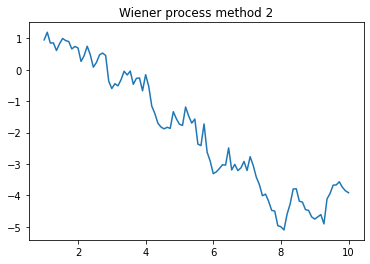

In [18]:
start_time = time.time()
t, y = generate_wiener2(100, 10)
print(time.time() - start_time)
plt.plot(t, y)
plt.title('Wiener process method 2')
plt.show()
# ta druga metoda jest dużo wolniejsza

c)

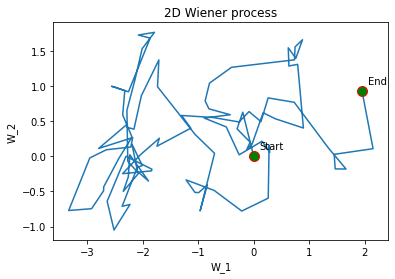

In [31]:
_, y1 = generate_wiener1(100, 10)
_, y2 = generate_wiener1(100, 10)
plt.plot(y1, y2)
plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.text(0.1, 0.1, 'Start', fontsize=10)
plt.plot(y1[-1], y2[-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.text(y1[-1]+0.1, y2[-1]+0.1, 'End', fontsize=10)
plt.title('2D Wiener process')
plt.xlabel('W_1')
plt.ylabel('W_2')
plt.show()

d) 

Dowód na to, że odpowiedni obiekt to proces Wienera oraz wytłumaczenie zależności $\rho$ od $t$ są w pliku `lab2_wiener_process.pdf`.

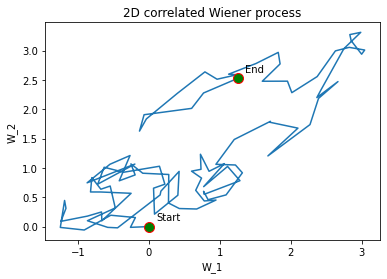

In [32]:
rho = 0.7

_, y1 = generate_wiener1(100, 10)
_, y2 = generate_wiener1(100, 10)
y = rho*y1 + np.sqrt(1 - rho**2)*y2
plt.plot(y1, y)
plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.text(0.1, 0.1, 'Start', fontsize=10)
plt.plot(y1[-1], y[-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.text(y1[-1]+0.1, y[-1]+0.1, 'End', fontsize=10)
plt.title('2D correlated Wiener process')
plt.xlabel('W_1')
plt.ylabel('W_2')
plt.show()
# zwiększając wartość rho otrzymujemy bardziej 'wyprostowany' obszar odwiedzany przez trajektorię

e)

In [21]:
def get_x(n):
    u = uniform(0, 1)
    if u < 1/(2*(n + 1)**(3/2)):
        return n + 1
    elif u < 1/((n + 1)**(3/2)):
        return -(n + 1)
    else:
        return 0

def get_y(n):
    u = uniform(0, 1)
    if u < 1/(2*(n + 1) * np.log(n + 1)):
        return n + 1
    elif u < 1/((n + 1) * np.log(n + 1)):
        return -(n + 1)
    else:
        return 0

def get_d(n):
    u = uniform(0, 1)
    if u < 1/(2*(n + 1)):
        return n + 1
    elif u < 1/((n + 1)):
        return -(n + 1)
    else:
        return 0

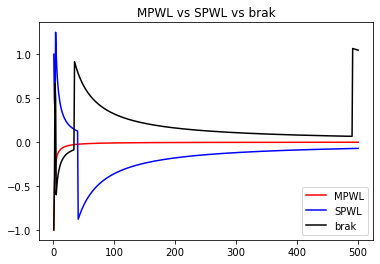

In [110]:
n = 500
xs = [0] * n
ys = [0] * n
ds = [0] * n

for i in range(n):
    xs[i] = get_x(i)
    ys[i] = get_y(i)
    ds[i] = get_d(i)

arg = np.arange(1, n+1)
xs = np.cumsum(xs) / arg
ys = np.cumsum(ys) / arg
ds = np.cumsum(ds) / arg

plt.plot(arg, xs, color='red', label='MPWL')
plt.plot(arg, ys, color='blue', label='SPWL')
plt.plot(arg, ds, color='black', label='brak')
plt.legend()
plt.title('MPWL vs SPWL vs brak')
plt.show()
# w drugim przypadku zachodzi SPWL, ale nie MPWL

f)

In [20]:
def border(n, T):
    t = np.linspace(10, T, n)
    return t, np.sqrt(2 * t * np.log(np.log(t)))

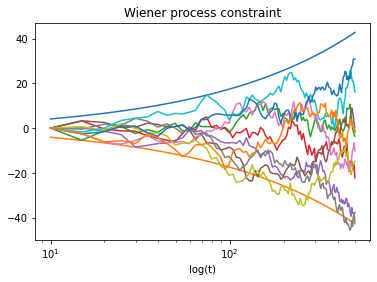

In [34]:
t, y = border(100, 500)
plt.plot(t, y)
plt.plot(t, -y)
for i in range(10):
    x, w = generate_wiener1(100, 500, start=10)
    plt.plot(x, w)
plt.xscale('log')
plt.xlabel('log(t)')
plt.title('Wiener process constraint')
plt.show()